In [2]:
setwd('C:/Users/sprot/Documents/GitHub/autodesk_adoption2/')
getwd()

[1] "C:/Users/sprot/Documents/GitHub/autodesk_adoption2"

In [3]:
library(tidyverse)
library(lubridate)

initial_load <- read_csv("data/autodesk_data.csv",col_types = list("order_number"="c",
                                                           "agreement_number"="c",
                                                           "channel_partner_csn"="c"))


#type converson functions:
convert_to_lgl <- function(x){
  #check if column is only consists of "Y","N" and "NA"
  unique_values <- unique(x)[complete.cases(unique(x))]
  lenth_unique <- length(unique_values)
  if(lenth_unique == 2){
    if (all(sort(unique_values) == sort(c("Y","N")))){
      y <- ifelse(x == "Y",TRUE,
                   ifelse(x == "N",FALSE,NA))
    } else {
      y <- x
    }
  } else {
    y <- x
  }
}

#set critical value to nubmer of countries
number_of_countreis <- length(unique(initial_load$country_code))
convert_to_fct <- function(x){
  number <- length(unique(x))
  if((class(x) == "character") & (number <= number_of_countreis)){
    y <- as.factor(x)
  } else {
    y <- x
  }
}

#
dataset <- initial_load %>% 
  mutate_all(convert_to_lgl) %>%
  mutate_all(convert_to_fct)

rm(initial_load)



Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.3.4     v dplyr   0.7.4
v tidyr   0.8.0     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lubridate' was built under R version 3.4.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0000   0.1333  41.7835 100.0000 100.0000 

percentage_reg_seats_activated                days_since_order_created 
                            1.000000000                             0.358850591 
                           renewal_rate     dap_days_used_in_previous_one_month 
                            0.354568983                             0.324125858 
                    dts_retention_score  dap_days_used_in_previous_second_month 
                            0.304902106                             0.286445938 
  dap_days_used_in_previous_third_month   active_and_registered_seats_activated 
                            0.284168048                             0.257120406 
 dap_days_used_in_previous_fourth_month dap_pct_days_used_since_agreement_start 
                            0.247604452                             0.230020990 
             dts_costomer_profile_score           dts_product_utilization_score 
                            0.227965066                             0.223342280 
         pns_days_since_agreement_start                onboarding_support_score 
                            0.214366211                             0.205049877 
                        readiness_score          dts_product_and_services_score 
                            0.192595489                             0.174964925 
     dap_pings_in_previous_second_month         dap_pings_in_previous_one_month 
                            0.169126652                             0.167102730 
      dts_subscription_engagement_score                 onboarding_access_score 
                            0.159394134                             0.154627602 
           pns_days_used_in_last_7_days       dap_pings_in_previous_third_month 
                            0.153217671                             0.148597621 
                       onboarding_score     pns_days_used_in_previous_one_month 
                            0.148243455                             0.146143206 
     dap_pings_in_previous_fourth_month pns_pct_days_used_since_agreement_start 
                            0.142970326                             0.136677218 
             active_registered_seat_sum  pns_days_used_in_previous_second_month 
                            0.130374596                             0.130066799 
    car_days_used_in_previous_one_month  pns_days_used_in_previous_fourth_month 
                            0.121418973                             0.120833231 
        dap_pings_since_agreement_start     dap_days_used_since_agreement_start 
                            0.118067463                             0.112906167 
           dap_days_used_in_last_7_days   pns_days_used_in_previous_third_month 
                            0.108716950                             0.104008916 
    car_days_used_since_agreement_start      pns_pings_in_previous_second_month 
                            0.099002068                             0.098647980 
   onboarding_product_utilization_score            car_days_used_in_last_7_days 
                            0.087258832                             0.083705173 
      pns_pings_in_previous_third_month         pns_pings_in_previous_one_month 
                            0.083658608                             0.082531773 
 car_days_used_in_previous_second_month                pns_pings_in_last_7_days 
                            0.082495918                             0.077481139 
     pns_pings_in_previous_fourth_month     pns_days_used_since_agreement_start 
                            0.076178998                             0.070554015 
               dap_pings_in_last_7_days   car_days_used_in_previous_third_month 
                            0.063328961                             0.062371046 
        pns_pings_since_agreement_start            sf_subscription_seats_billed 
                            0.056426998                             0.055665479 
               car_pings_in_last_7_days       car_pings_in_previous_third_month 
                            0.052178326 

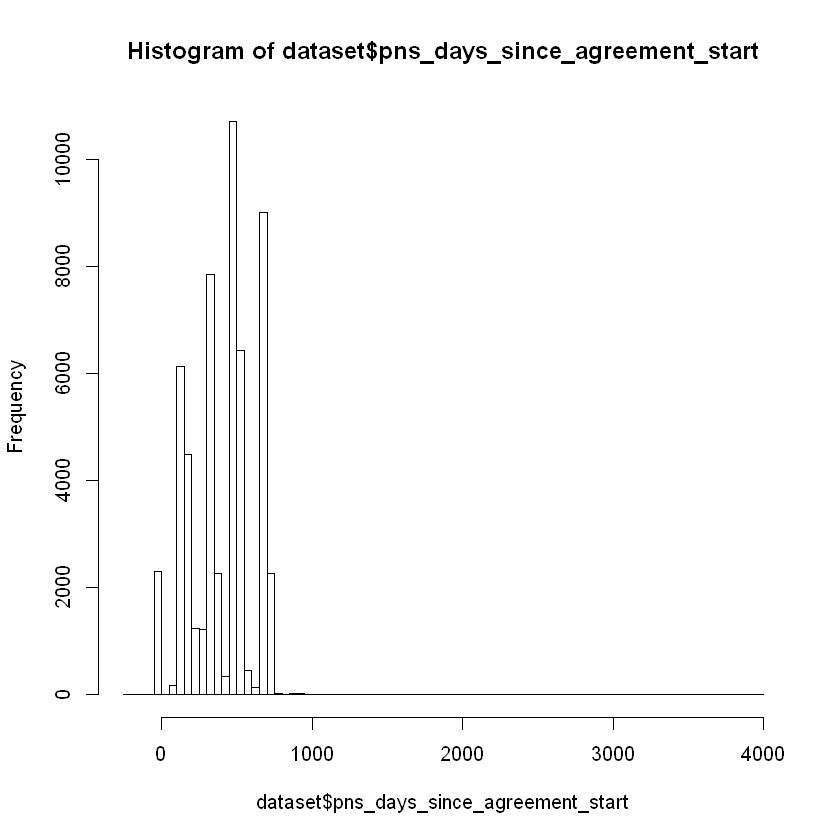

In [8]:
hist(dataset$pns_days_since_agreement_start, breaks=100) #histogram of distribution. SOme spikes, could indicate data collection patterns/issues

summary(dataset$percentage_reg_seats_activated) #mean 41.78%
numeric_only = dataset %>%
  select_if(is.numeric)
our_cor =  cor(numeric_only, use = 'complete.obs') #any other way to handle NA? complete will drop the whole column even for 1 NA.

#we want the corr of percentage_reg_seats to find the highest (by absolute value) correlation
cor_of_act = our_cor['percentage_reg_seats_activated',]
cor_of_act_abs = abs(cor_of_act) #Absolute values of correlation scores
cor_of_act_abs = sort(cor_of_act_abs, decreasing = TRUE)
cor_of_act_abs #highest one 0.35, not very strong


In [23]:
dataset %>%
  group_by(onboarding_health) %>%
    summarise(mean_activation = mean(percentage_reg_seats_activated))

by_chan_part_id = dataset %>%
  group_by(channel_partner_uuid)

activation_by_reseller = by_chan_part_id %>% #! See the large range. Not all resellers are created equal. WHY?
  summarise(mean_activation = mean(percentage_reg_seats_activated), 
            reseller_tot_seats = sum(active_registered_seat_sum),
            country = first(country_name)) %>% #tenative country
    arrange(desc(mean_activation))

country_sum = activation_by_reseller %>% #!!! Very significant differences. China seems to perform by far the worst of all the large markets. WHY?
  group_by(country) %>%
    summarise(country_mean = mean(mean_activation),
              num_records = sum(reseller_tot_seats)) %>%
      arrange(desc(country_mean))


by_chan_part_type = dataset %>% #no significant correlation
  group_by(channel_partner_type) %>%
    summarise(mean_activation = mean(percentage_reg_seats_activated))

dataset2 = dataset %>%
  mutate(quarter1 = quarter(agreement_start_date,with_year = T))

by_chan_part_tier = dataset2 %>% 
  group_by(partner_tier) %>%
  summarise(mean_activation = mean(percentage_reg_seats_activated)) %>%
  ungroup()

by_cust_size = dataset %>% #SMB and ENT do better than VSB. UNK do badly!
  group_by(customer_size_code) %>%
    summarise(mean_activation = mean(percentage_reg_seats_activated))
                                   
by_quarter = dataset %>%
  group_by(fiscal_quarter_and_year) %>%
    summarise(mean_activation = mean(percentage_reg_seats_activated))

active_only = dataset %>%
  filter(agreement_status == 'Active')

non_zero_seats = dataset %>%
  filter(active_registered_seat_sum > 0)
      
across_userbase_activation = non_zero_seats %>%
  group_by(fiscal_quarter_and_year) %>%
    mutate(on_seats_basis_mean_activation = sum(active_and_registered_seats_activated)/sum(active_registered_seat_sum)) %>% # there are some cases of 0 seats
  ungroup()


onboarding_health,mean_activation
At Risk,33.21605
Good,51.53145
Monitor,35.74488
NA,27.52468


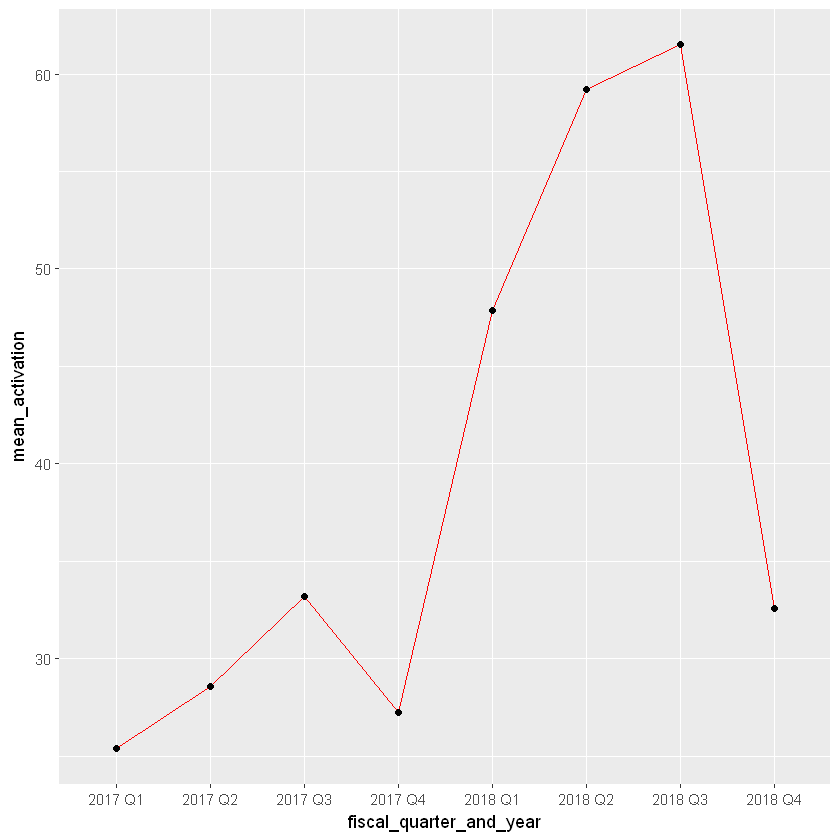

In [10]:
mean_act_by_quarter_compbasis_p = ggplot(data = by_quarter, mapping = aes(x=fiscal_quarter_and_year, y=mean_activation, group =1)) + 
  geom_line(color = 'red') + geom_point()
mean_act_by_quarter_compbasis_p #why is the trend so upward? seems very data collection related, hard to believe that the actual activations change so much.
#why we have future data? Billing?

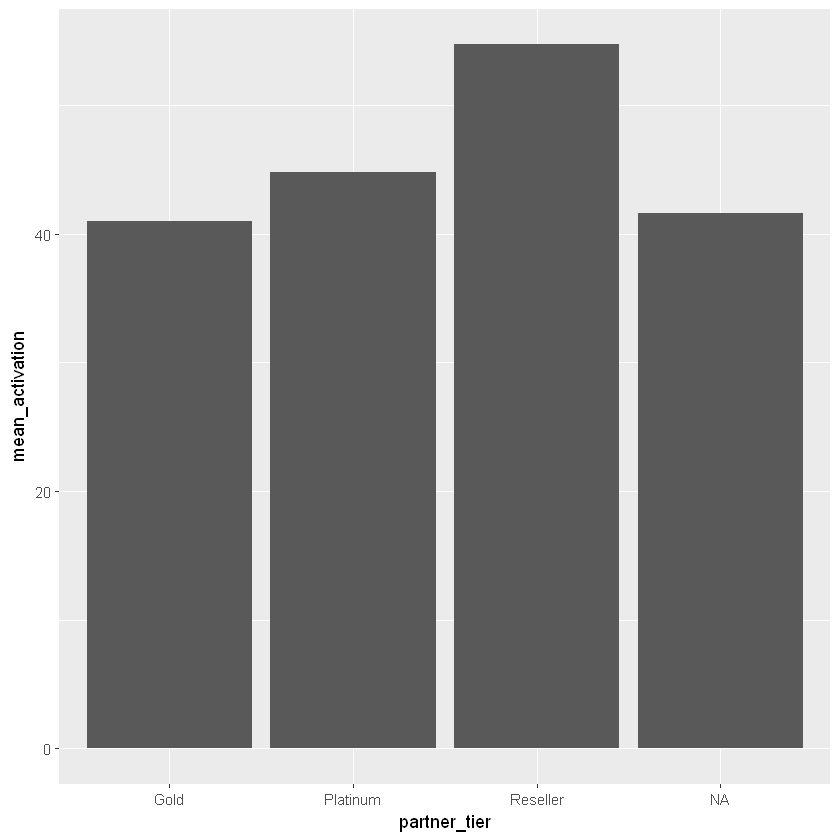

In [11]:
mean_act_by_part_tier_p = ggplot(data = by_chan_part_tier, mapping = aes(x=partner_tier, y=mean_activation)) + geom_col()
mean_act_by_part_tier_p 

In [13]:
sum(dataset$active_registered_seat_sum)
#[1] 192198
sum(dataset$active_and_registered_seats_activated)
#[1] 192712
#unexpected small difference. Parent / owner? 1956AC7C-C016-4a39-83BD-A0057BC972E5 has 7 activated but 0 total seats???

#some rows have more activated than registered
problematic_rows <- dataset %>%
  dplyr::filter(active_and_registered_seats_activated > active_registered_seat_sum)


[1] 192198

[1] 192712

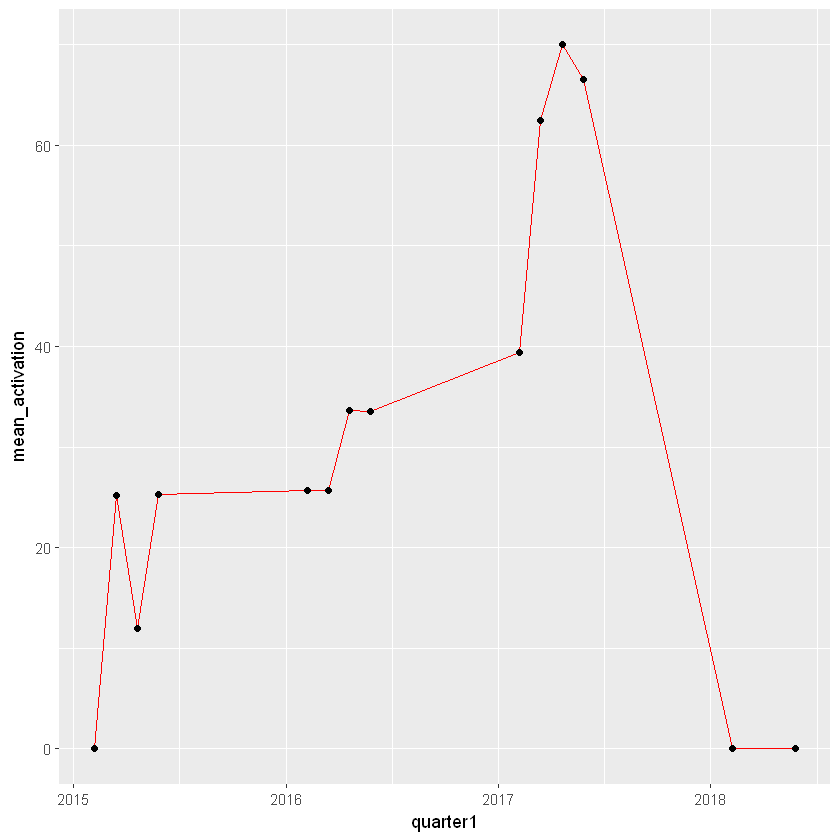

In [14]:
#group by quater and redo 
dataset %>%
  dplyr::filter(agreement_start_date > ymd("2015-03-15")) %>%
  mutate(quarter1 = quarter(agreement_start_date,with_year = T)) %>%
  group_by(quarter1) %>%
  summarise(mean_activation = mean(percentage_reg_seats_activated)) %>%
  ggplot(mapping = aes(x=quarter1, y=mean_activation, group =1)) + 
  geom_line(color = 'red') + geom_point()


[1] TRUE

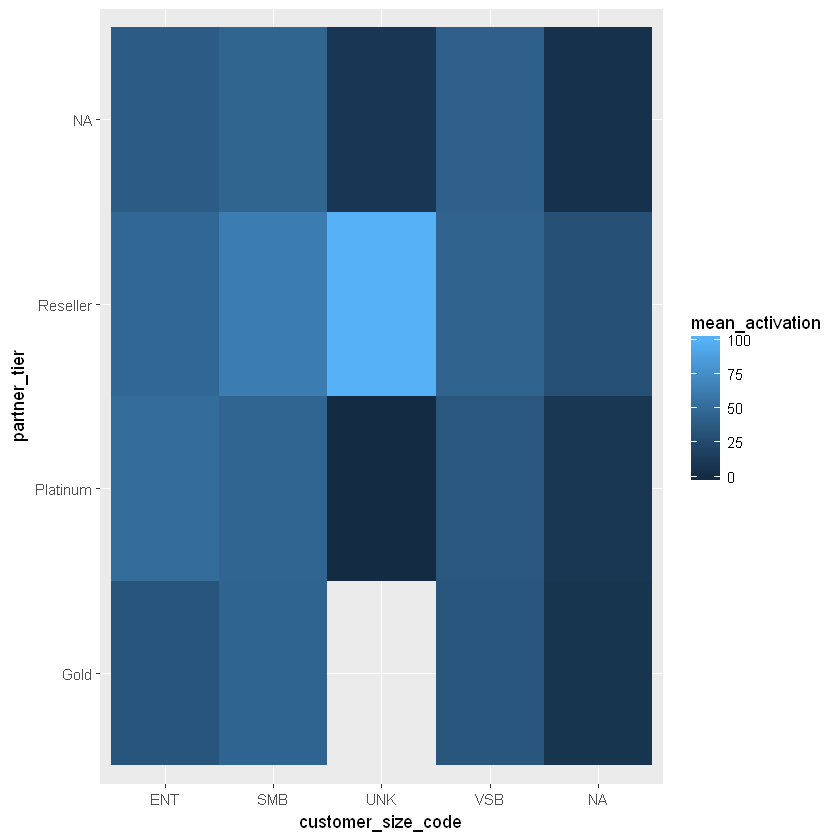

In [15]:
relationship <- dataset %>%
  distinct(channel_partner_csn,channel_partner_uuid) %>%
  group_by(channel_partner_csn) %>%
  mutate(one_to_many = n_distinct(channel_partner_uuid)) %>%
  ungroup()
all(relationship$one_to_many == 1)


dataset %>%
  group_by(customer_size_code,partner_tier) %>%
  summarise(mean_activation = mean(percentage_reg_seats_activated)) %>%
  ungroup() %>%
  ggplot(aes(x = customer_size_code,y=partner_tier,fill=mean_activation)) +
  geom_tile()


In [24]:
country_sum = country_sum %>% arrange(desc(country_mean))
head(country_sum, 20)
tail(country_sum, 20)

country,country_mean,num_records
Faroe Islands,100.00000,1
Ireland,100.00000,1
Chile,64.37945,366
Uganda,62.17117,140
United Kingdom,59.21968,13605
Germany,57.71090,8053
Hungary,56.30389,436
Saudi Arabia,56.19696,383
Portugal,55.65591,838
France,55.04235,13381


country,country_mean,num_records
Indonesia,32.378664,1408
"Korea, Republic Of",32.100312,5827
NA,31.190268,371
Peru,30.380952,163
Malaysia,29.096040,3513
Poland,25.464026,3352
Guatemala,25.037342,558
Austria,24.626027,936
Israel,24.441354,723
Turkey,23.947912,3190
